In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
assets = ['VOO', 'VYM', 'VHT']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2018-1-1')['Adj Close']

In [3]:
pf_data.head() #makre sure companies were public at starting date

,VOO,VYM,VHT
Date,,,
2018-01-02,230.026459,75.506035,146.987442
2018-01-03,231.394943,75.752098,148.447342
2018-01-04,232.409668,76.086044,148.485016
2018-01-05,233.899185,76.428772,149.652939
2018-01-08,234.383286,76.569397,148.937103


In [4]:
pf_data.tail() #check companies still open and public at ending date

,VOO,VYM,VHT
Date,,,
2022-01-21,402.690002,109.849998,241.389999
2022-01-24,404.369995,110.080002,241.110001
2022-01-25,399.459991,110.160004,238.850006
2022-01-26,398.559998,109.660004,237.559998
2022-01-27,396.540009,109.529999,236.850006


<AxesSubplot:xlabel='Date'>

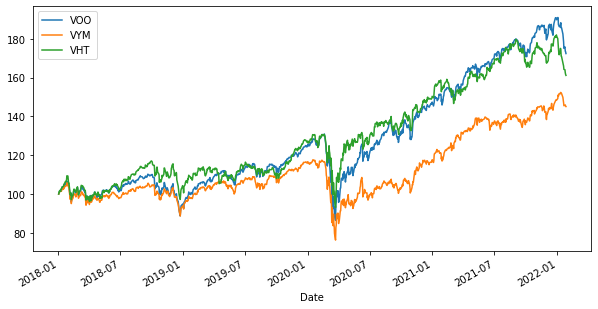

In [5]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10, 5))

In [6]:
log_returns = np.log(pf_data / pf_data.shift(1))

In [7]:
log_returns.mean() * 250

VOO    0.132825
VYM    0.090728
VHT    0.116361
dtype: float64

In [8]:
log_returns.cov() * 250

,VOO,VYM,VHT
VOO,0.044762,0.040469,0.038130
VYM,0.040469,0.041428,0.034656
VHT,0.038130,0.034656,0.040360


In [9]:
log_returns.corr()

,VOO,VYM,VHT
VOO,1.000000,0.939758,0.897087
VYM,0.939758,1.000000,0.847537
VHT,0.897087,0.847537,1.000000


In [10]:
num_assets = len(assets)

num_assets

arr = np.random.random(2)
arr

arr[0] + arr[1]

weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

weights[0] + weights[1] + weights[2]

### Expected Portfolio Return:

np.sum(weights * log_returns.mean()) * 250

### Expected Portfolio Variance:

np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

### Expected Portfolio Volatility:

np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))

***

In [11]:
pfolio_returns = []
pfolio_volatilities = []
w0 = []
w1 = []
w2 = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    w0.append(weights[0])
    w1.append(weights[1])
    w2.append(weights[2])
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)
w0 = np.array(w0)
w1 = np.array(w1)
w2 = np.array(w2)

pfolio_returns, pfolio_volatilities, w0, w1, w2

(array([0.10510099, 0.10992274, 0.12344374, 0.12061324, 0.11645433,
        0.09635266, 0.11615007, 0.1205488 , 0.10899807, 0.12156447,
        0.11632349, 0.10167042, 0.11936847, 0.11378649, 0.10264887,
        0.11431209, 0.11339485, 0.12063655, 0.10711706, 0.11410544,
        0.10701414, 0.10991453, 0.11111172, 0.12831699, 0.10097584,
        0.1111438 , 0.12158697, 0.12069703, 0.11674919, 0.11749277,
        0.10365677, 0.10639155, 0.1142908 , 0.11302245, 0.11568236,
        0.10599353, 0.10623241, 0.11566514, 0.11367563, 0.11997283,
        0.11114028, 0.11107448, 0.1106529 , 0.10581739, 0.10975516,
        0.12855898, 0.10841226, 0.11993622, 0.11307796, 0.11053618,
        0.11332391, 0.11189489, 0.11409748, 0.11836583, 0.10987255,
        0.10672865, 0.10928551, 0.1191164 , 0.11719986, 0.10908159,
        0.1232033 , 0.12972231, 0.11758045, 0.1113992 , 0.11507436,
        0.12315841, 0.10679183, 0.11734382, 0.11537601, 0.12130574,
        0.09985878, 0.11419297, 0.10098653, 0.11

In [12]:
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities, assets[0]: w0, assets[1]: w1, assets[2]: w2})

In [13]:
portfolios.head()

,Return,Volatility,VOO,VYM,VHT
0,0.105101,0.195671,0.107560,0.508368,0.384072
1,0.109923,0.195451,0.026028,0.267890,0.706082
2,0.123444,0.200898,0.531595,0.065129,0.403276
3,0.120613,0.199233,0.417776,0.102447,0.479777
4,0.116454,0.197774,0.327751,0.206874,0.465375


In [14]:
portfolios.tail()

,Return,Volatility,VOO,VYM,VHT
995,0.114928,0.198996,0.393654,0.308749,0.297597
996,0.117967,0.199949,0.466080,0.236718,0.297202
997,0.119952,0.198824,0.380938,0.104567,0.514495
998,0.104144,0.196778,0.139526,0.566248,0.294226
999,0.103583,0.196993,0.136769,0.586349,0.276882


In [15]:
portfolios.sort_values(by=['Volatility'])

,Return,Volatility,VOO,VYM,VHT
584,0.104131,0.194348,0.003865,0.479601,0.516534
77,0.105136,0.194368,0.008899,0.443647,0.547454
218,0.103826,0.194410,0.007373,0.493769,0.498858
408,0.106402,0.194486,0.013480,0.397192,0.589328
575,0.103694,0.194517,0.015150,0.503903,0.480947
...,...,...,...,...,...
61,0.129722,0.209107,0.899159,0.056274,0.044567
252,0.130444,0.209370,0.914496,0.037969,0.047535
156,0.130361,0.210310,0.938614,0.056707,0.004679
311,0.130972,0.210633,0.954289,0.042915,0.002796


Text(0, 0.5, 'Expected Return')

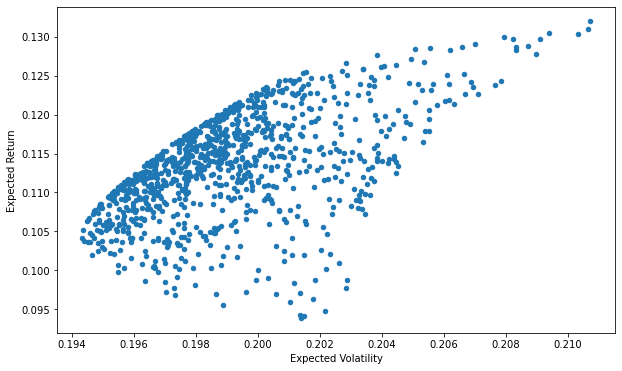

In [16]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

In [20]:
#generate path and name then export
path = 'C:/Users/liang/Documents/Alphabetic/F/Finance/Python Scripts for Finance/Efficient Frontier results/'
name = '_'.join(assets) + '.csv'
path_name = path + name 
portfolios.sort_values(by=['Volatility']).to_csv(path_name)